# Moringa Prep data Science Independent Project Week 3 

Objective-Study the given dataset and find a strategy on how MTN Cote d'Ivoire will go about the upgrade of its infrastructure within the given cities

Dataset Provided:

cells_geo_description.xlsx [Link] (Links to an external site.)

cells_geo.csv [Link] (Links to an external site.)

CDR_description.xlsx [Link] (Links to an external site.)

CDR 20120507 [http://bit.ly/TelecomDataset1] (Links to an external site.)

CDR 20120508 [http://bit.ly/TelecomDataset2] (Links to an external site.)

CDR 20120509 [http://bit.ly/TelecomDataset3]

Main steps to be followed:
*   Setting up our notebook environment
*   Loading our Data
*   Understanding our Data
*   Cleaning our Data
*   Merging our Data
*   Analyzing our Data

# Setting up our Environment

importing our libraries

In [ ]:
# we import our pandas and numpy libraries as follows
import pandas as pd
import numpy as np


# Loading Our Dataset And Understanding Our Data

The following cells will load our dataset into our envronment.
Additionally we will preview the first five entries.
This will allow us to get a view of the kind of data in our datasets.
Additionally we will run some codes to get some general information about our data so as to better understand it.

In [ ]:
# let us load our telcom 1 dataset into our environmnet
# here we also choose column names that are descriptive and understandable names
# then we preview our first five entries to ensure the table has been loaded correctly
tel1 = pd.read_csv('Telcom_dataset.csv')
tel1.columns = ['PRODUCT', 'PRICE', 'DATETIME','CELL_ON_SITE', 'CALLER', 'RECEIVER', 'COUNTRY_OF_CALLER', 'COUNTRY_OF_RECEIVER', 'CELL_ID', 'SITE_ID']
tel1.head()

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


Since all the Telcom Dataset contain same structure, here is a brief description of the columns in our telcom dataset:

PRODUCT - Voice or SMS

PRICE - Billing Price

DATETIME - Time in format yyy-mm-dd hh:mm:ss.0

CALLER - Anonymized phone number of person making a call

RECEIVER - Anonymized phone number of person receiving the call

COUNTRY OF CALLER- Country of the person making a call

COUNTRY OF RECEIVER - Country of the person receiving a call 

CELL ID - Id of the cell

SITE ID - Id of the site

In [ ]:
# we run the code below to view the dimensions of our code
# by this we mean we want to see how many columns and rows are in our dataset
tel1.shape

(5001, 10)

In [ ]:
# let us get some general information about our data
# since telecom dataset 1,2 &3 have the same data stucture, we will only need to view info for one dataset
tel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PRODUCT              5001 non-null   object
 1   PRICE                5001 non-null   int64 
 2   DATETIME             5001 non-null   object
 3   CELL_ON_SITE         5001 non-null   object
 4   CALLER               5001 non-null   object
 5   RECEIVER             5001 non-null   object
 6   COUNTRY_OF_CALLER    5001 non-null   object
 7   COUNTRY_OF_RECEIVER  5001 non-null   object
 8   CELL_ID              5001 non-null   object
 9   SITE_ID              4285 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [ ]:
# let us load our telcom 2 dataset into our environmnet
# here we also rename our column names to descriptive and understandable names
# then we preview our first five entries to ensure the table has been loaded correctly
tel2 = pd.read_csv('Telcom_dataset2.csv') 
tel2.columns = ['PRODUCT', 'PRICE', 'DATETIME','CELL_ON_SITE', 'CALLER', 'RECEIVER', 'COUNTRY_OF_CALLER', 'COUNTRY_OF_RECEIVER', 'CELL_ID', 'SITE_ID']
tel2.head()

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
# we run the code below to view the dimensions of our code
# by this we mean we want to see how many columns and rows are in our dataset
tel2.shape

(5001, 10)

In [ ]:
# let us load our telcom 3 dataset into our environmnet
# here we also rename our column names to descriptive and understandable names
# then we preview our first five entries to ensure the table has been loaded correctly
tel3 = pd.read_csv('Telcom_dataset3.csv') 
tel3.columns = ['PRODUCT', 'PRICE', 'DATETIME','CELL_ON_SITE', 'CALLER', 'RECEIVER', 'COUNTRY_OF_CALLER', 'COUNTRY_OF_RECEIVER', 'CELL_ID', 'SITE_ID']
tel3.head()

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


In [ ]:
# we run the code below to view the dimensions of our code
# by this we mean we want to see how many columns and rows are in our dataset
tel3.shape

(5001, 10)

From the above code cells, we can see that our three telcom datasets all have the same sahpe. i.e they each have 5001 rows and 10 columns.

In [ ]:
# let us load our geographical dataset into our environmnet
# here we also rename some of our column names to descriptive and understandable names
# then we preview our first five entries to ensure the table has been loaded correctly
geo= pd.read_csv('cells_geo.csv', delimiter = ";") 
geo.rename(columns = {'Unnamed: 0':'INDEX' ,'VILLES':'CITY','LOCALISATION':'IN/OUT_OF_ABIDJAN','DECOUPZONE':'GEOZONE'}, inplace=True)
geo.head(10)

,INDEX,CITY,STATUS,IN/OUT_OF_ABIDJAN,GEOZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
5,5,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,0b4f56438f,8a1e6ce31f
6,6,KRIKOREA,In Service,INTERIEUR,Grand-OUEST,"KRIKOREA""",-6.627056,6.707361,HAUT SASSANDRA,NaN,041d2504f5,260dbfedc5
7,7,ABOBO,In Service,ABIDJAN,"""Abidjan_NORD",NPONON,-4.023583,5.435694,LAGUNE,NaN,a70c1d263b,56306cc7ca
8,8,ABOBO,In Service,ABIDJAN,"""Abidjan_NORD",NPONON,-4.023583,5.435694,LAGUNE,NaN,e2d04ea883,56306cc7ca
9,9,ABOBO,NaN,ABIDJAN,"""Abidjan_NORD",NPONON,-4.023583,5.435694,LAGUNE,NaN,ee224cd27e,56306cc7ca


Here is a brief description of the columns in our geographical dataset:

CITY - city

STATUS - Whether there is MTN service or not

IN/OUT OF ABIDJAN- If localisation is in Abidjan or not

GEOZONE - Geographical zone

ZONENAME - Name of Zone

LONGITUDE- Longitudinal Position

LATITUDE - Latitudinal position

REGION - Region 

AREA - General area

CELL ID - Id of the cell

SITE CODE -Site (there are several cells per site, several sites per City, several Cities per Zone, etc.)

In [ ]:
# we run the code below to view the dimensions of our code
# by this we mean we want to see how many columns and rows are in our dataset
geo.shape

(3974, 12)

In [ ]:
# let us get some general information about our geo dataset
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX              3974 non-null   int64  
 1   CITY               3974 non-null   object 
 2   STATUS             3907 non-null   object 
 3   IN/OUT_OF_ABIDJAN  3974 non-null   object 
 4   GEOZONE            3974 non-null   object 
 5   ZONENAME           3968 non-null   object 
 6   LONGITUDE          3974 non-null   float64
 7   LATITUDE           3974 non-null   float64
 8   REGION             3974 non-null   object 
 9   AREA               3951 non-null   object 
 10  CELL_ID            3974 non-null   object 
 11  SITE_CODE          3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


# Data Cleaning(Telcom Dataset)

We will now go through the process of cleaning our data so that we are only able to view information relevant to our analysis 

In [ ]:
# first we will merge the three telcom dataset tables into one 
# so that the three day data is all in one master table for easier analysis
# this process has been made snoother by the fact that we declared same column names
# for all the tables when were loading them into our environment

tel_all = pd.concat([tel1,tel2,tel3], axis=0)
tel_all

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4998,Voice,32,2012-05-09 00:01:43.0,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


From the above merging process, we can see that all the data from the three tables now exists in one Dataframe because we now have 15003 rows and 10 columns.

In [ ]:
# lets see if there are any duplicates in our data
# And let us further drop these duplicates
tel_all.duplicated()
tel_all2 = tel_all.drop_duplicates()
tel_all2

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43.0,0,2f834987f0c1825,accc8e5c1164343,19e2e,OTHER,6467daa1db,8a96bae9c1
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


In [ ]:
# we need to check if there are any missing values in our data
# we then drop all these missing values from our table 
tel_all2.isnull()
tel_all_no_missing = tel_all2.dropna()
tel_all_no_missing

,PRODUCT,PRICE,DATETIME,CELL_ON_SITE,CALLER,RECEIVER,COUNTRY_OF_CALLER,COUNTRY_OF_RECEIVER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43.0,0,2f834987f0c1825,accc8e5c1164343,19e2e,OTHER,6467daa1db,8a96bae9c1
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


In [ ]:
# now let us drop some columns that are not useful for our analysis
# we will drop the Caller, Receiver, Countries, Cell on site
# we drop these columns since the data in it has been anonymized hence, 
# it does not provide us with any further insight into our data 
tel_clean = tel_all_no_missing.drop(columns = ['CALLER', 'RECEIVER', 'COUNTRY_OF_CALLER', 'COUNTRY_OF_RECEIVER', 'CELL_ON_SITE','SITE_ID'])
print('This is our Telcom DataFrame after deleting columns')
tel_clean

This is our Telcom DataFrame after deleting columns


,PRODUCT,PRICE,DATETIME,CELL_ID
0,Voice,0,2012-05-06 23:04:37.0,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,051KhYDCpv
...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43.0,6467daa1db
4996,Voice,0,2012-05-09 00:01:43.0,2aa04dcab7
4997,Voice,62,2012-05-09 00:01:43.0,7f1f2f889f
4999,Voice,30,2012-05-09 00:01:43.0,98ed726da2


In [ ]:
# Let us now Drop rows where all cells in that row is NA 
telCleaned = tel_clean.dropna()
telCleaned

,PRODUCT,PRICE,DATETIME,CELL_ID
0,Voice,0,2012-05-06 23:04:37.0,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,051KhYDCpv
...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43.0,6467daa1db
4996,Voice,0,2012-05-09 00:01:43.0,2aa04dcab7
4997,Voice,62,2012-05-09 00:01:43.0,7f1f2f889f
4999,Voice,30,2012-05-09 00:01:43.0,98ed726da2


In [ ]:
# let us view our dataframe to see if there are any non-null values
# so we can replace or drop these values
telCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12789 entries, 0 to 5000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PRODUCT   12789 non-null  object
 1   PRICE     12789 non-null  int64 
 2   DATETIME  12789 non-null  object
 3   CELL_ID   12789 non-null  object
dtypes: int64(1), object(3)
memory usage: 499.6+ KB


From the info in the cell above, there are no non-null values in our merged telcom dataset so we can continue with other data cleaning processes

# Geo Table Data Cleaning

In [ ]:
# let us first drop any rows for which status is not in service
# so that we only have information about places that have and use MTN services
newGeo= geo[geo['STATUS'] !='IN SERVICE'].dropna()
newGeo

,INDEX,CITY,STATUS,IN/OUT_OF_ABIDJAN,GEOZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
23,23,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,f740406877,0f34c36ac5
24,24,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,959e54c8f7,0f34c36ac5
25,25,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,56b7e7000c,0f34c36ac5
26,26,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,bc51c17a6f,0f34c36ac5
27,27,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,e460975c9f,0f34c36ac5
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
#lets see if there are any duplicates in our data
#let us further drop these duplicates
newGeo.duplicated()
geo2= newGeo.drop_duplicates()
geo2

,INDEX,CITY,STATUS,IN/OUT_OF_ABIDJAN,GEOZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
23,23,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,f740406877,0f34c36ac5
24,24,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,959e54c8f7,0f34c36ac5
25,25,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,56b7e7000c,0f34c36ac5
26,26,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,bc51c17a6f,0f34c36ac5
27,27,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,e460975c9f,0f34c36ac5
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
# we need to check if there are any missing values in our data
# we then drop all these missing values from our table 
geo2.isnull()
geo2_no_missing = geo2.dropna()
geo2_no_missing

,INDEX,CITY,STATUS,IN/OUT_OF_ABIDJAN,GEOZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
23,23,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,f740406877,0f34c36ac5
24,24,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,959e54c8f7,0f34c36ac5
25,25,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,56b7e7000c,0f34c36ac5
26,26,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,bc51c17a6f,0f34c36ac5
27,27,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,e460975c9f,0f34c36ac5
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
# Let us also clean our geo DataFrame by dropping some columns we don't need from it
geo3 = geo2_no_missing.drop(columns = ['INDEX', 'LONGITUDE', 'LATITUDE', 'ZONENAME', 'STATUS', 'AREA', 'GEOZONE', 'SITE_CODE'])
print('This is our Geo DataFrame after deleting columns')
geo3

This is our Geo DataFrame after deleting columns


,CITY,IN/OUT_OF_ABIDJAN,REGION,CELL_ID
23,ABOBO,ABIDJAN,LAGUNE,f740406877
24,ABOBO,ABIDJAN,LAGUNE,959e54c8f7
25,ABOBO,ABIDJAN,LAGUNE,56b7e7000c
26,ABOBO,ABIDJAN,LAGUNE,bc51c17a6f
27,ABOBO,ABIDJAN,LAGUNE,e460975c9f
...,...,...,...,...
3969,ZUENOULA,INTERIEUR,MARAHOUE,1cfc2d7ab1
3970,ZUENOULA,INTERIEUR,MARAHOUE,3ae1708153
3971,ZUENOULA,INTERIEUR,MARAHOUE,cb71f8a29c
3972,ZUENOULA,INTERIEUR,MARAHOUE,d4a6a0b645


In [ ]:
# Let us now drop rows where all cells in that row is NA 
geoClean= geo3.dropna()
geoClean

,CITY,IN/OUT_OF_ABIDJAN,REGION,CELL_ID
23,ABOBO,ABIDJAN,LAGUNE,f740406877
24,ABOBO,ABIDJAN,LAGUNE,959e54c8f7
25,ABOBO,ABIDJAN,LAGUNE,56b7e7000c
26,ABOBO,ABIDJAN,LAGUNE,bc51c17a6f
27,ABOBO,ABIDJAN,LAGUNE,e460975c9f
...,...,...,...,...
3969,ZUENOULA,INTERIEUR,MARAHOUE,1cfc2d7ab1
3970,ZUENOULA,INTERIEUR,MARAHOUE,3ae1708153
3971,ZUENOULA,INTERIEUR,MARAHOUE,cb71f8a29c
3972,ZUENOULA,INTERIEUR,MARAHOUE,d4a6a0b645


# Merging of our Data Frames

In [ ]:
# let us now merge the two dataframes.
# here we use the outer join which joins the two tables on the similar column provide
# it matches rows with same key and returns Nan for non-matching data
cleanData = telCleaned.merge(geoClean, on=['CELL_ID'], how='outer')
cleanData

,PRODUCT,PRICE,DATETIME,CELL_ID,CITY,IN/OUT_OF_ABIDJAN,REGION
0,Voice,0.0,2012-05-06 23:04:37.0,/TJNe+Mmtu,NaN,NaN,NaN
1,sms,0.0,2012-05-06 23:40:48.0,/TJNe+Mmtu,NaN,NaN,NaN
2,sms,0.0,2012-05-07 23:32:47.0,/TJNe+Mmtu,NaN,NaN,NaN
3,sms,0.0,2012-05-07 23:52:21.0,/TJNe+Mmtu,NaN,NaN,NaN
4,data,0.0,2012-05-07 23:53:21.0,/TJNe+Mmtu,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16664,NaN,NaN,NaN,1cfc2d7ab1,ZUENOULA,INTERIEUR,MARAHOUE
16665,NaN,NaN,NaN,3ae1708153,ZUENOULA,INTERIEUR,MARAHOUE
16666,NaN,NaN,NaN,cb71f8a29c,ZUENOULA,INTERIEUR,MARAHOUE
16667,NaN,NaN,NaN,d4a6a0b645,ZUENOULA,INTERIEUR,MARAHOUE


In [ ]:
# let us see the information in our combined dataframe
print(cleanData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16669 entries, 0 to 16668
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRODUCT            12789 non-null  object 
 1   PRICE              12789 non-null  float64
 2   DATETIME           12789 non-null  object 
 3   CELL_ID            16669 non-null  object 
 4   CITY               3880 non-null   object 
 5   IN/OUT_OF_ABIDJAN  3880 non-null   object 
 6   REGION             3880 non-null   object 
dtypes: float64(1), object(6)
memory usage: 1.0+ MB
None


# Analysis

In [ ]:
# now let us find out which were the most used cities in the three days provided
pd.set_option('display.max_rows', None)
groupedCity = cleanData['CITY'].value_counts()
groupedCity

COCODY                354
YOPOUGON              289
ABOBO                 244
MARCORY               141
TREICHVILLE           132
ADJAME                104
YAMOUSSOUKRO          104
PLATEAU               100
KOUMASSI               91
BOUAKE                 65
DALOA                  59
PORT-BOUET             59
SAN-PEDRO              55
GAGNOA                 55
ATTECOUBE              45
DIVO                   36
KORHOGO                32
SOUBRE                 28
BINGERVILLE            27
GRAND-BASSAM           27
GUIGLO                 27
ANYAMA                 27
MEADJI                 25
ABENGOUROU             21
ADZOPE                 21
DUEKOUE                21
MAN                    21
BONDOUKOU              21
ABOISSO                18
BONOUA                 18
DIMBOKRO               16
BOUAFLE                15
ISSIA                  15
LAKOTA                 15
AGBOVILLE              15
TOUMODI                14
DABOU                  12
VAVOUA                 12
SEGUELA     

In [ ]:
# let us see how much the customers spent on all MTN Products
print('The total billing price of all MTN products for the three days was')
cleanData['PRICE'].sum()

The total billing price of all MTN products for the three days was


348194.0

In [ ]:
# further let us see how much customers spent on the various products they provide in the three days  

groupedProducts = cleanData.groupby(['PRODUCT'])[['PRICE']].sum().reset_index()
groupedProducts

,PRODUCT,PRICE
0,Voice,293816.0
1,data,2001.0
2,sms,52377.0


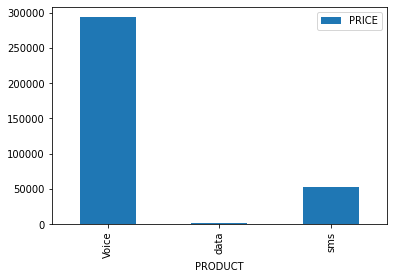

In [ ]:
# let us now plot a quick bargraph to visually see the above data
groupedProducts.plot.bar(x='PRODUCT', y='PRICE')

From running the code above and looking at the bar graph, we can see that a high amount of airtime was used on voice calls. 

In [ ]:
# let us now find out which of
mostUsed = cleanData.groupby(by='PRODUCT').agg('count').reset_index()
mostUsed

,PRODUCT,PRICE,CELL_ID,CITY,IN/OUT_OF_ABIDJAN,REGION
0,Voice,5568,5568,0,0,0
1,data,271,271,0,0,0
2,sms,6950,6950,0,0,0


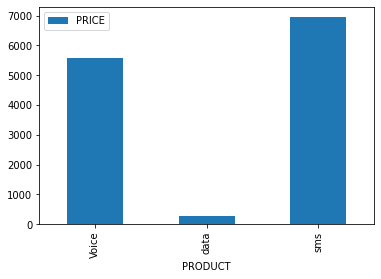

In [ ]:
# let us now get a visual representation of the above code to better understand our results
mostUsed.plot.bar(x='PRODUCT', y='PRICE')

In [ ]:
# let us see what was the lowest spend on MTN products from a single customer
print('The lowest spend on a single MTN product for the three days was')
cleanData['PRICE'].min()

The lowest spend on a single MTN product for the three days was


0.0

In [ ]:
# let us also see what was the highest spend from a single customer was on MTN products
print('The highest spend on a single MTN product for the three days was')
cleanData['PRICE'].max()

The highest spend on a single MTN product for the three days was


6750.0

In [ ]:
# let us find out how much (on average) MTN users spent on MTN products 
print('The average spend on MTN Products for the three days was')
cleanData['PRICE'].mean()

The average spend on MTN Products for the three days was


27.226053639846743

In [ ]:
# let us see which regions used MTN services the most in the three days provided
groupedRegion = cleanData['REGION'].value_counts()
groupedRegion

LAGUNE               1800
BAS SASSANDRA         248
HAUT SASSANDRA        164
LACS                  160
VALLEE DU BANDAMA     158
SAVANE                150
SUD BANDAMA           125
NZI COMOE             111
FROMAGER              110
ZANZAN                105
MOYEN CAVALLY         102
WORODOUGOU             99
18 MONTAGNES           99
AGNEBY                 99
MOYEN COMOE            84
SUD COMOE              78
MARAHOUE               78
DENGUELE               68
BAFING                 42
Name: REGION, dtype: int64

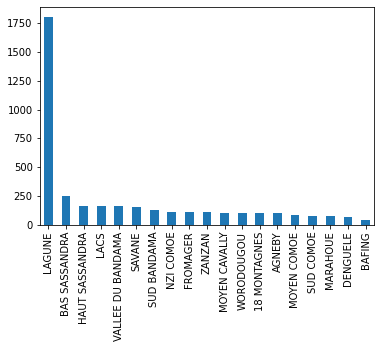

In [ ]:
# let us now plot a quick bargraph to visually see the above data
groupedRegion.plot.bar(x='REGION', y='')

In [ ]:
# let us now group our data by time of day to find out 
# at what time MTN services are used the most 
pd.set_option('display.max_rows', None)
time = cleanData.groupby(cleanData.index.time).mean()
time
time.rank(method='max')
cleanData.resample('H').sum()

,PRICE
DATETIME,
2012-05-06 23:00:00,12815.0
2012-05-07 00:00:00,106631.0
2012-05-07 01:00:00,0.0
2012-05-07 02:00:00,0.0
2012-05-07 03:00:00,0.0
2012-05-07 04:00:00,0.0
2012-05-07 05:00:00,0.0
2012-05-07 06:00:00,0.0
2012-05-07 07:00:00,0.0


In [156]:
# let us see whether MTN services are used mostly in or out of abidjan 
groupedAbidjan = cleanData['IN/OUT_OF_ABIDJAN'].value_counts()
groupedAbidjan 

INTERIEUR    2261
ABIDJAN      1619
Name: IN/OUT_OF_ABIDJAN, dtype: int64

# Conclusion

From the analysis above we can see that:

Cocody, Yopoung, Abobo, Marcory and Treichville were top 5 cities where MTN services were mosly used. 

Lagune was the region where MTTN services were mostly used.

sms was the most used MTN product however, customers spent the most on voice calls.

Based on the above analysis and summary, we can recommend that MTN starts upgrade their technology infrastructure that supports voice calls and sms in the most used cities and region. 